In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15

In [2]:
np.random.seed(121)

N = 1000
std = 0.6
bananas = pd.DataFrame({
    'length': np.random.normal(8, std, N),
    'width': np.random.normal(4, std, N),
    'class': np.zeros(N, dtype='int')}
)

apples = pd.DataFrame({
    'length': np.random.normal(6, std, N),
    'width': np.random.normal(6, std, N),
    'class': np.ones(N, dtype='int')}
)

fruits = pd.concat([bananas, apples])

In [4]:
bananas.head()

,length,width,class
0,7.872780,3.756298,0
1,7.829042,3.954792,0
2,7.655661,4.182660,0
3,7.735814,3.209214,0
4,7.801934,4.040239,0


Text(0, 0.5, 'Width')

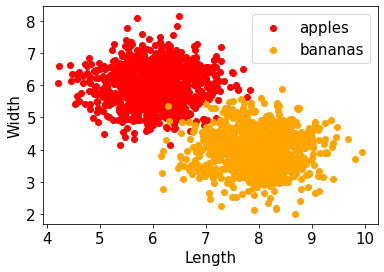

In [14]:
plt.scatter(x=apples['length'], y=apples['width'], label='apples', color='red')
plt.scatter(x=bananas['length'], y=bananas['width'], label='bananas', color='orange')
plt.legend(loc='best')
plt.xlabel('Length')
plt.ylabel('Width')

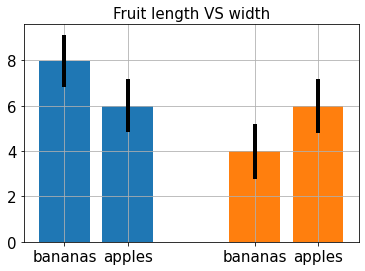

In [17]:
labels = ['bananas', 'apples', 'bananas', 'apples']
x = [1, 1.5, 2.5, 3.0]
height = [fruits.loc[fruits['class'] == 0, 'length'].mean(),
          fruits.loc[fruits['class'] == 1, 'length'].mean(),
          fruits.loc[fruits['class'] == 0, 'width'].mean(),
          fruits.loc[fruits['class'] == 1, 'width'].mean()]

yerr = [2*fruits.loc[fruits['class'] == 0, 'length'].std(),
        2*fruits.loc[fruits['class'] == 1, 'length'].std(),
        2*fruits.loc[fruits['class'] == 0, 'width'].std(),
        2*fruits.loc[fruits['class'] == 1, 'width'].std()]

color = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']

plt.bar(x=x,
        height=height,
        color=color,
        width=0.4,
        error_kw={'lw': 4},
        yerr=yerr)
plt.xticks(ticks=x, labels=labels)
plt.title('Fruit length VS width')

plt.grid()

Text(0.5, 1.0, 'Length Distribution ')

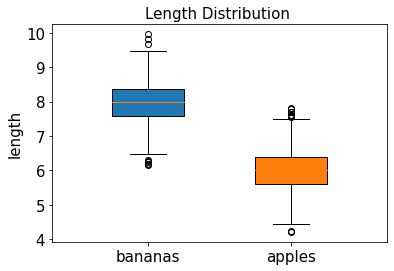

In [27]:
fea = 'length'
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 0],
            patch_artist=True, boxprops={'facecolor': 'tab:blue'},
            positions=[0], labels=['bananas'], widths=[0.15])
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 1],
            patch_artist=True, boxprops={'facecolor': 'tab:orange'},
            positions=[0.3], labels=['apples'], widths=[0.15])
plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution ')

Text(0.5, 0, 'Width')

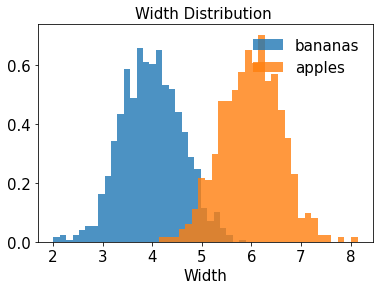

In [39]:
fea = 'width'

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas', alpha=0.8)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples', alpha=0.8)
         
plt.legend(frameon=False, loc='best')
plt.title('Width Distribution ')
plt.xlabel('Width')

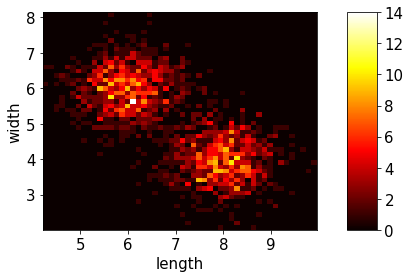

In [44]:
fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d(x='length', y='width', bins=50, data=fruits, cmap=plt.cm.hot)
ax.set_xlabel('length')
ax.set_ylabel('width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)

Text(0.5, 0, 'L/W ratio')

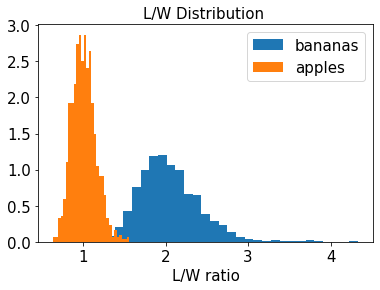

In [50]:
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples',)
plt.legend()
plt.title('L/W Distribution ')
plt.xlabel('L/W ratio')

Text(0.5, 0, 'Area')

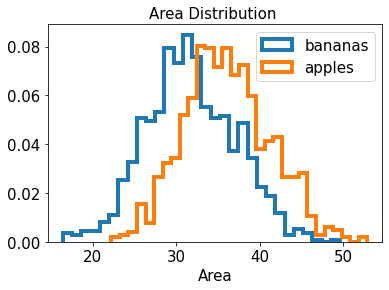

In [55]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('Area Distribution ')
plt.legend()
plt.xlabel('Area')

Text(0.5, 0, 'Circumference')

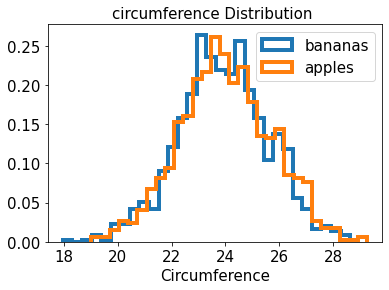

In [56]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('circumference Distribution ')
plt.legend()
plt.xlabel('Circumference')

In [57]:
from scipy import stats

In [58]:
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=82.438425661083, pvalue=0.0)

In [59]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-18.33979554877528, pvalue=1.4737736564093967e-69)

In [60]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-1.3170522756675043, pvalue=0.1879721312693096)